In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [2]:
import argparse
def main():
    # Create the argument parser
    parser = argparse.ArgumentParser(description='Training script')
    
    # Add the command-line arguments
    parser.add_argument('--lr', type=float, default=0.01, help='learning rate')
    parser.add_argument('--momentum', type=float, default=0.5, help='momentum')
    parser.add_argument('--num_hidden', type=int, default=3, help='number of hidden layers')
    parser.add_argument('--sizes', type=list, default=[100,100,100], help='sizes of hidden layers')
    parser.add_argument('--activation', type=str, default='sigmoid', help='activation function')
    parser.add_argument('--loss', type=str, default='sq', help='loss function')
    parser.add_argument('--opt', type=str, default='adam', help='optimizer')
    parser.add_argument('--batch_size', type=int, default=20, help='batch size')
    parser.add_argument('--anneal', type=bool, default=True, help='whether to anneal the learning rate')
    parser.add_argument('--save_dir', type=str, default='pa1/', help='directory to save models')
    parser.add_argument('--expt_dir', type=str, default='pa1/exp1/', help='directory for experiment')
    parser.add_argument('--train', type=str, help='training data file')
    parser.add_argument('--test', type=str, help='testing data file')

    # Parse the command-line arguments
    args = parser.parse_args()

    # Access the argument values
    lr = args.lr
    momentum = args.momentum
    num_hidden = args.num_hidden
    sizes = [int(size) for size in args.sizes.split(',')]
    activation = args.activation
    loss = args.loss
    opt = args.opt
    batch_size = args.batch_size
    anneal = args.anneal
    save_dir = args.save_dir
    expt_dir = args.expt_dir
    train_file = args.train
    test_file = args.test

    # Rest of your code goes here
    # ...




In [3]:
    !pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.4 MB/s eta 0:00:00


In [4]:

    import py7zr
    with py7zr.SevenZipFile('/kaggle/input/cifar-10/test.7z', mode='r') as z:
        z.extractall()

In [5]:
    with py7zr.SevenZipFile('/kaggle/input/cifar-10/train.7z', mode='r') as z:
        z.extractall()

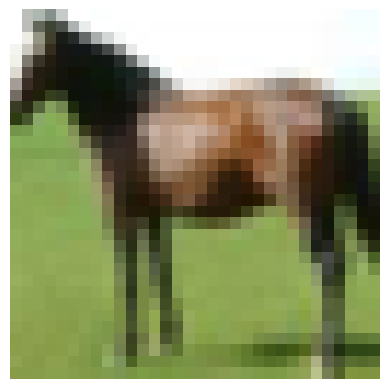

In [6]:
    import cv2
    import os
    import matplotlib.pyplot as plt

    # Directory path containing the images
    directory = "/kaggle/working/train"

    # Iterate over files in the directory
    for filename in os.listdir(directory):
        # Check if the file has an image extension
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Construct the full file path
            file_path = os.path.join(directory, filename)

            # Load the image using OpenCV
            image_data = cv2.imread(file_path)

            # Check if the image was successfully loaded
            if image_data is not None:
                # Perform desired operations on the image
                # For example, you can process or analyze the image here
                # Here's a sample code to display the image using Matplotlib
                plt.imshow(cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB))
                plt.axis('off')
                #plt.show()
            #else:
                #print("Failed to load the image:", file_path)




In [7]:


    # Directory path containing the images
    directory = "/kaggle/working/train"

    # Initialize lists to store image data and labels
    image_data = []
    labels = []

    # Iterate over files in the directory
    for filename in os.listdir(directory):
        # Check if the file has an image extension
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Construct the full file path
            file_path = os.path.join(directory, filename)

            # Load the image using OpenCV
            image = cv2.imread(file_path)

            # Check if the image was successfully loaded
            if image is not None:
                # Preprocess the image if required
                # For example, you can resize, normalize, or flatten the image here
                # Here's a sample code to resize the image to a specific size
                #image = cv2.resize(image, (64, 64))

                # Convert the image to grayscale if needed
                # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Convert the image to float32
                image = image.astype(np.float32)

                # Normalize the image pixel values between 0 and 1
                image /= 255.0

                # Append the image data and label to the lists
                image_data.append(image)
                labels.append(filename)  # Assuming the filename represents the label
            else:
                print("Failed to load the image:", file_path)

    # Convert the image data and labels to NumPy arrays
    X = np.array(image_data)
    Y = np.array(labels)

    # Perform any additional preprocessing or splitting of the data as needed
    # For example, you can split the data into training and testing sets

    # Pass the image data to the MLP for further processing
    # Make sure to reshape the input data according to the MLP input requirements
    # For example, if the MLP expects flattened input, use image_data.reshape(-1) to flatten the data


In [8]:
    # Directory path containing the images
    directory = "/kaggle/working/test"

    # Initialize lists to store image data and labels
    image_data = []
    labels = []

    # Iterate over files in the directory
    for filename in os.listdir(directory):
        # Check if the file has an image extension
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Construct the full file path
            file_path = os.path.join(directory, filename)

            # Load the image using OpenCV
            image = cv2.imread(file_path)

            # Check if the image was successfully loaded
            if image is not None:
                # Preprocess the image if required
                # For example, you can resize, normalize, or flatten the image here
                # Here's a sample code to resize the image to a specific size
                #image = cv2.resize(image, (64, 64))

                # Convert the image to grayscale if needed
                # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Convert the image to float32
                image = image.astype(np.float32)

                # Normalize the image pixel values between 0 and 1
                image /= 255.0

                # Append the image data and label to the lists
                image_data.append(image)
                labels.append(filename)  # Assuming the filename represents the label
            else:
                print("Failed to load the image:", file_path)

    # Convert the image data and labels to NumPy arrays
    X_val = np.array(image_data)
    Y_val = np.array(labels)

    # Perform any additional preprocessing or splitting of the data as needed
    # For example, you can split the data into training and testing sets

    # Pass the image data to the MLP for further processing
    # Make sure to reshape the input data according to the MLP input requirements
    # For example, if the MLP expects flattened input, use image_data.reshape(-1) to flatten the data

In [9]:
    print(f"The shape of the training set is: {X.shape[0]} x {X.shape[1]}")
    #print(f"The shape of the test set is: {X.shape[0]} x {X_test.shape[1]}")
    print(Y_val.shape[0])
    print(Y_val)

The shape of the training set is: 50000 x 32
300000
['148292.png' '223519.png' '74450.png' ... '133700.png' '69160.png'
 '29672.png']


In [10]:
    class MLP():

        def __init__(self,X,Y,X_val,Y_val,sizes,num_hidden=1,N_l=128):
            self.X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
            self.Y = np.squeeze(np.eye(10)[Y.astype(np.int).reshape(-1)])
            self.X_val = np.concatenate((X_val,np.ones((X_val.shape[0],1))),axis=1)#adding 1 to the input values to include bias
            self.Y_val = np.squeeze(np.eye(10)[Y_val.astype(np.int).reshape(-1)])
            self.num_hidden = num_hidden
            self.N_l = N_l
            self.n_samples = self.X.shape[0]
            self.All_sizes =np.array([self.X.shape[1]]+[sizes]+[self.Y.shape[1]])
            self.sizes =sizes
            self.__init_weights()

            #to monitor the performance of the MLP
            self.train_loss = list()
            self.train_acc = list()
            self.val_loss = list()
            self.val_acc = list()
            self.train_time = list()
            self.tot_time = list()
            self.metrics = [self.train_loss,self.train_acc,self.val_loss,self.val_acc,self.train_time,self.tot_time]

In [11]:
        def __sigmoid(self,x):
            # VCompute the sigmoid
            return 1./(1.+np.exp(-x))

        def __tanh(self,x):
            return np.tanh(x)

        def __softmax(self,x):
            # Compute softmax along the rows of the input
            exponent = np.exp(x)
            return exponent/exponent.sum(axis=1,keepdims=True)

        def __loss(self,y_pred,y,loss):
            # Compute the loss along the rows, averaging along the number of samples
            if(loss=='ce'):
                return ((-np.log(y_pred))*y).sum(axis=1).mean()
            elif(loss=='sq'):
                return ((y_pred-y)**2).sum(axis=1).mean()        

In [12]:
        def __accuracy(self,y_pred,y):  
            # Compute the accuracy along the rows, averaging along the number of samples
            return np.all(y_pred==y,axis=1).mean()
        def __activation_prime(self,h,activation):
            if(activation=='tanh'):
                return 1- h**2
            elif(activation=='sigmoid'):
                return h*(1-h)


        def __to_categorical(self,x):  
            # Transform probabilities into categorical predictions row-wise, by simply taking the max probability
            categorical = np.zeros((x.shape[0],self.Y.shape[1]))
            categorical[np.arange(x.shape[0]),x.argmax(axis=1)] = 1
            return categorical

        def __init_weights(self):
            # Initialize the weights of the network given the sizes of the layers
            self.weights = list()
            for i in range(self.All_sizes.shape[0]-1):
                self.weights.append(np.random.uniform(-1,1,size=[self.All_sizes[i],self.All_sizes[i+1]]))
            self.weights = np.asarray(self.weights)

        def __init_layers(self,batch_size):
            # Initialize and allocate arrays for the hidden layer activations 
            self.__h = [np.empty((batch_size,layer)) for layer in self.All_sizes]

In [13]:
        def __feed_forward(self,batch):
            # Perform a forward pass of `batch` samples (N_samples x N_features)
            h_l = batch
            self.__h[0] = h_l
            for i,weights in enumerate(self.weights):
                h_l = self.__activation(h_l.dot(weights))
                self.__h[i+1]=h_l
            self.__out = self.__softmax(self.__h[-1])

        def __back_prop(self,batch_y, activation, momentum, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8 ):
            # Update the weights of the network through back-propagation
            if(opt=='gd'):
                delta_t = (self.__out - batch_y)*self.__activation_prime(self.__h[-1], activation)
                for i in range(1,len(self.weights)+1):
                    self.weights[-i]-=self.lr*(self.__h[-i-1].T.dot(delta_t))/self.batch_size
                    delta_t = self.__activation_prime(self.__h[-i-1], activation)*(delta_t.dot(self.weights[-i].T))
            elif(opt=='momentum'):
                delta_t = (self.__out - batch_y)*self.__activation_prime(self.__h[-1], activation)
                for i in range(1,len(self.weights)+1):
                    momentum= 0.9*momentum + self.lr*(self.__h[-i-1].T.dot(delta_t))/self.batch_size
                    self.weights[-i]-=momentum
                    delta_t = self.__activation_prime(self.__h[-i-1], activation)*(delta_t.dot(self.weights[-i].T))
            elif(opt=='adam'):
                m_dw, v_dw = 0, 0
                m_db, v_db = 0, 0

                m_dw = beta1*m_dw + (1-beta1)*dw
                # *** biases *** #
                m_db = beta1*m_db + (1-beta1)*db

                ## rms beta 2
                # *** weights *** #
                v_dw = beta2*v_dw + (1-beta2)*(dw**2)
                # *** biases *** #
                v_db = beta2*v_db + (1-beta2)*(db)

                ## bias correction
                m_dw_corr = m_dw/(1-beta1**t)
                m_db_corr = m_db/(1-beta1**t)
                v_dw_corr = v_dw/(1-beta2**t)
                v_db_corr = v_db/(1-beta2**t)

                ## update weights and biases
                w = w - eta*(m_dw_corr/(np.sqrt(v_dw_corr)+epsilon))
                b = b - eta*(m_db_corr/(np.sqrt(v_db_corr)+epsilon))

In [14]:
        def train(self,batch_size=8,epochs=25,lr=1.0):
            # Train the model with a given batch size, epochs, and learning rate. Store and print relevant metrics.
            self.lr = lr
            self.batch_size=batch_size
            for epoch in range(epochs):
                start = time.time()

                self.__init_layers(self.batch_size)
                shuffle = np.random.permutation(self.n_samples)
                train_loss = 0
                train_acc = 0
                X_batches = np.array_split(self.X[shuffle],self.n_samples/self.batch_size)
                Y_batches = np.array_split(self.Y[shuffle],self.n_samples/self.batch_size)
                for batch_x,batch_y in zip(X_batches,Y_batches):
                    self.__feed_forward(batch_x)  
                    train_loss += self.__loss(self.__out,batch_y)
                    train_acc += self.__accuracy(self.__to_categorical(self.__out),batch_y)
                    self.__back_prop(batch_y)

                train_loss = (train_loss/len(X_batches))
                train_acc = (train_acc/len(X_batches))
                self.train_loss.append(train_loss)
                self.train_acc.append(train_acc)

                train_time = round(time.time()-start,3)
                self.train_time.append(train_time)

                self.__init_layers(self.X_val.shape[0])
                self.__feed_forward(self.X_val)
                val_loss = self.__loss(self.__out,self.Y_val)
                val_acc = self.__accuracy(self.__to_categorical(self.__out),self.Y_val)
                self.val_loss.append(val_loss)
                self.val_acc.append(val_acc)

                tot_time = round(time.time()-start,3)
                self.tot_time.append(tot_time)

                print(f"Epoch {epoch+1}: loss = {train_loss.round(3)} | acc = {train_acc.round(3)} | val_loss = {val_loss.round(3)} | val_acc = {val_acc.round(3)} | train_time = {train_time} | tot_time = {tot_time}")
                print('falala')
